На сегодняшнем занятии будем работать с датасетом BlackFriday (ниже есть его описание):

https://www.kaggle.com/mehdidag/black-friday/version/1

Description The dataset here is a sample of the transactions made in a retail store. The store wants to know better the customer purchase behaviour against different products. Specifically, here the problem is a regression problem where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.

Classification problem can also be settled in this dataset since several variables are categorical, and some other approaches could be "Predicting the age of the consumer" or even "Predict the category of goods bought". This dataset is also particularly convenient for clustering and maybe find different clusters of consumers within it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('BlackFriday.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Подготовка данных

In [3]:
data.shape

(550068, 12)

In [4]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values.head()

Product_Category_3    383247
Product_Category_2    173638
User_ID                    0
Product_ID                 0
Gender                     0
dtype: int64

Скорее всего NaN-ы в Product_Category_2 и Product_Category_3 означают, что человек не покупал продукты из этих категорий.

Поэтому можем заменить эти пропущенные значения на 0.

In [5]:
data = data.fillna(0)

Посмотрим, какие типы данных есть в нашем датасете.

Выведите на экран тип каждой колонки в таблице.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
data['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [8]:
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'M' else 0 )

In [9]:
data['Gender'].value_counts()

1    414259
0    135809
Name: Gender, dtype: int64


Обработаем нечисловые колонки.

1) Выведите на экран все возможные значения из столбца Gender.

2) Замените в столбце Gender значение 'M' на 1, а 'F' на 0.

In [10]:
#your code here


Поработаем со столбцом Age.

1) Выведите на экран все возможные значения из столбца Age.

2) Напишите функцию для перевода каждого диапазона возрастов в число (самые маленькие возрасты - 0, следующий диапазон - 1 и т.д.). Замените значения в столбце Age на числовые, применив эту функцию.

In [11]:
np.sort(data['Age'].unique())

array(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'],
      dtype=object)

In [12]:
def map_age(age):
    if age == '0-17':
        return 0
    elif age == '18-25':
        return 1
    elif age == '26-35':
        return 2
    elif age == '36-45':
        return 3
    elif age == '46-50':
        return 4
    elif age == '51-55':
        return 5
    return 6
    
    
data['Age'] = data['Age'].apply(map_age)

In [13]:
data['Age'].value_counts()

2    219587
3    110013
1     99660
4     45701
5     38501
6     21504
0     15102
Name: Age, dtype: int64

Обработаем столбец City_Category.

1) Выведите все уникальные значения данного столбца.

2) Закодируйте столбец с помощью OneHotEncoding (get_dummies).

In [14]:

#your code here
data['City_Category'].unique()

data = pd.get_dummies(data, columns=['City_Category'], dtype=int)
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_A,City_Category_B,City_Category_C
0,1000001,P00069042,0,0,10,2,0,3,0.0,0.0,8370,1,0,0
1,1000001,P00248942,0,0,10,2,0,1,6.0,14.0,15200,1,0,0
2,1000001,P00087842,0,0,10,2,0,12,0.0,0.0,1422,1,0,0
3,1000001,P00085442,0,0,10,2,0,12,14.0,0.0,1057,1,0,0
4,1000002,P00285442,1,6,16,4+,0,8,0.0,0.0,7969,0,0,1


Наконец, обработаем Stay_In_Current_City_Years.

1) Выведите на экран все уникальные значения данного столбца.

2) Замените '4+' на 4, а все остальные значения оставьте как есть, но переведите их в числовой вид (x -> int(x)).

In [15]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [19]:
data['Stay_In_Current_City_Years'].unique()

def map_stay(years):
    if years == '0':
        return 0
    elif years == '1':
        return 1
    elif years == '2':
        return 2
    elif years == '3':
        return 3
    return 4
    
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].apply(map_stay)

In [20]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_A,City_Category_B,City_Category_C
0,1000001,P00069042,0,0,10,2,0,3,0.0,0.0,8370,1,0,0
1,1000001,P00248942,0,0,10,2,0,1,6.0,14.0,15200,1,0,0
2,1000001,P00087842,0,0,10,2,0,12,0.0,0.0,1422,1,0,0
3,1000001,P00085442,0,0,10,2,0,12,14.0,0.0,1057,1,0,0
4,1000002,P00285442,1,6,16,4,0,8,0.0,0.0,7969,0,0,1


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   Stay_In_Current_City_Years  550068 non-null  int64  
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
 11  City_Category_A             550068 non-null  int64  
 12  City_Category_B             550068 non-null  int64  
 13  City_Category_

In [22]:
data.describe()

,User_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_A,City_Category_B,City_Category_C
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,0.753105,2.496430,8.076707,1.858418,0.409653,5.404270,6.735436,3.841941,9263.968713,0.268549,0.420263,0.311189
std,1.727592e+03,0.431205,1.353632,6.522660,1.289443,0.491770,3.936211,6.215492,6.250712,5023.065394,0.443205,0.493601,0.462980
min,1.000001e+06,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000
25%,1.001516e+06,1.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,5823.000000,0.000000,0.000000,0.000000
50%,1.003077e+06,1.000000,2.000000,7.000000,2.000000,0.000000,5.000000,5.000000,0.000000,8047.000000,0.000000,0.000000,0.000000
75%,1.004478e+06,1.000000,3.000000,14.000000,3.000000,1.000000,8.000000,14.000000,8.000000,12054.000000,1.000000,1.000000,1.000000
max,1.006040e+06,1.000000,6.000000,20.000000,4.000000,1.000000,20.000000,18.000000,18.000000,23961.000000,1.000000,1.000000,1.000000


In [23]:
data = data.drop(['User_ID', 'Product_ID'], axis = 1)

In [24]:
#Удалим столбцы User_ID и Product_ID, так как они не несут полезной для нас информации.


#your code here

data.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_A,City_Category_B,City_Category_C
0,0,0,10,2,0,3,0.0,0.0,8370,1,0,0
1,0,0,10,2,0,1,6.0,14.0,15200,1,0,0
2,0,0,10,2,0,12,0.0,0.0,1422,1,0,0
3,0,0,10,2,0,12,14.0,0.0,1057,1,0,0
4,1,6,16,4,0,8,0.0,0.0,7969,0,0,1


# Исследование данных

Как влияет пол на целевую переменную Purchase? Постройте диаграмму (barplot).

Как влияет возраст на целевую переменную Purchase? Постройте диаграмму (barplot).

Как влияет City_Category на целевую переменную Purchase? Постройте диаграмму (barplot).

In [ ]:
#your code here
Нарисуйте матрицу корреляций признаков.

plt.figure(figsize=(12,9))
#your code here

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

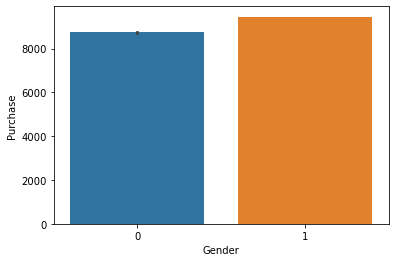

In [26]:
sns.barplot(x = data['Gender'], y = data['Purchase'])

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

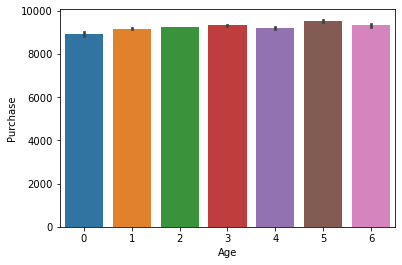

In [27]:
sns.barplot(x = data['Age'], y = data['Purchase'])

In [36]:
data.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_A,City_Category_B,City_Category_C
0,0,0,10,2,0,3,0.0,0.0,8370,1,0,0
1,0,0,10,2,0,1,6.0,14.0,15200,1,0,0
2,0,0,10,2,0,12,0.0,0.0,1422,1,0,0
3,0,0,10,2,0,12,14.0,0.0,1057,1,0,0
4,1,6,16,4,0,8,0.0,0.0,7969,0,0,1


In [37]:
data[['City_Category_A', 'City_Category_B', 'City_Category_C']].head()

,City_Category_A,City_Category_B,City_Category_C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1


# Масштабирование (нормализация) признаков в линейных моделях

В линейных и метрических (основанных на вычислении расстояния между объектами) моделях необходимо масштабировать признаки.

Нормализация признаков - приведение всех признаков к одинаковому масштабу (например, приведение всех значений на отрезок $[0;1]$).

Зачем нужна нормализация? Если машстабы измерений признаков существенно (на несколько порядков) различаются, то появляется опасноcть, что будут учитываться только «крупномасштабные» признаки.

Как делать нормализацию в Python: StandardScaler или MinMaxScaler из библиотеки sklearn.preprocessing.

# Построение модели

In [46]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X = data.copy()

y = data['Purchase']
X.drop(['Purchase'], axis=1, inplace=True)

indices = np.arange(len(X))

Xtrain, Xtest, ytrain, ytest, idx_train, idx_test = train_test_split(
                                                    X, y, indices, test_size=0.2, random_state=111)

scaler = StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

ypred_train = regressor.predict(Xtrain)
ypred_test = regressor.predict(Xtest)

r2_score(ytrain,ypred_train), r2_score(ytest,ypred_test)

(0.15331547778565346, 0.14902791749432287)

Посмотрим на веса обученной модели.

In [52]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
coefficients

,0,0
0,Gender,2.060792e+02
1,Age,1.515462e+02
2,Occupation,3.339005e+01
3,Stay_In_Current_City_Years,1.489061e+01
4,Marital_Status,-2.240681e+01
5,Product_Category_1,-1.381720e+03
6,Product_Category_2,7.310055e+01
7,Product_Category_3,8.922649e+02
8,City_Category_A,-2.869520e+15
9,City_Category_B,-3.197951e+15


In [55]:
coefficients.columns = ['name', 'value']

In [56]:
coefficients.head()

,name,value
0,Gender,206.079152
1,Age,151.546205
2,Occupation,33.390049
3,Stay_In_Current_City_Years,14.890606
4,Marital_Status,-22.406806


In [57]:
coefficients = coefficients.sort_values('value')

In [60]:
coefficients

,name,value
9,City_Category_B,-3.197951e+15
10,City_Category_C,-2.996982e+15
8,City_Category_A,-2.869520e+15
5,Product_Category_1,-1.381720e+03
4,Marital_Status,-2.240681e+01
3,Stay_In_Current_City_Years,1.489061e+01
2,Occupation,3.339005e+01
6,Product_Category_2,7.310055e+01
1,Age,1.515462e+02
0,Gender,2.060792e+02


Добавим L1 регуляризацию.

In [63]:
from sklearn.linear_model import Lasso

regressor2 = Lasso(alpha=10)
regressor2.fit(Xtrain, ytrain)

ypred2 = regressor2.predict(Xtest)

print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
print(regressor2.coef_,'\n')

Scores: 0.14898924718963913 21491017.121897914
[  199.05766064   129.34628009    25.59314712     5.264726
    -7.89696947 -1374.35853054    63.16476329   887.61770164
   -62.40590677    -0.           212.61067229] 




Посмотрим, что происходит при разных значениях параметра регуляризации $\alpha$

In [68]:
np.arange(1,100,10)

array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])

In [65]:
from sklearn.linear_model import Lasso

for a in np.arange(0.1,10000.1,25):
    regressor2 = Lasso(alpha=a)
    regressor2.fit(Xtrain, ytrain)

    ypred2 = regressor2.predict(Xtest)

    print('alpha={}'.format(a))
    print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
    print(regressor2.coef_,'\n')

alpha=0.1
Scores: 0.14902148332357557 21490203.046042718
[  207.41128308   142.190037      32.9292987     14.46419735
   -22.04021433 -1381.42482924    71.59163369   893.25245857
  -205.01317732  -152.03308113    75.90038736] 

alpha=25.1
Scores: 0.14885013000884684 21494530.32041448
[  186.10342447   114.12695457    14.12385263     0.
    -0.         -1363.57552868    50.22581145   878.99060704
   -52.90793519    -0.           203.75363273] 

alpha=50.1
Scores: 0.14843085579011095 21505118.470310196
[  163.85284151    92.64591487     0.             0.
    -0.         -1345.69982734    28.70560423   864.6400634
   -37.02136926    -0.           188.95256155] 

alpha=75.1
Scores: 0.14779865624187472 21521083.734286867
[  139.956157      69.91058593     0.             0.
     0.         -1327.75597486     7.14066405   850.20865393
   -21.03235334    -0.           173.85981663] 

alpha=100.1
Scores: 0.14702706776428487 21540569.05938785
[  116.1262919     46.88214543     0.             0.


alpha=975.1
Scores: 0.09069597060454049 22963127.55181284
[   0.            0.            0.            0.            0.
 -677.8096526     0.          212.03654807   -0.           -0.
    0.        ] 

alpha=1000.1
Scores: 0.08792834621396972 23033019.80989338
[   0.            0.            0.            0.            0.
 -659.76436741    0.          193.9919603    -0.           -0.
    0.        ] 

alpha=1025.1
Scores: 0.08508960698531176 23104707.9679645
[   0.            0.            0.            0.            0.
 -641.71908222    0.          175.94737252   -0.           -0.
    0.        ] 

alpha=1050.1
Scores: 0.08217975291856627 23178192.026026208
[   0.            0.            0.            0.            0.
 -623.67379704    0.          157.90278474   -0.           -0.
    0.        ] 

alpha=1075.1
Scores: 0.0791987840137327 23253471.984078508
[   0.            0.            0.            0.            0.
 -605.62851185    0.          139.85819697   -0.           -0.
    

alpha=2250.1
Scores: -2.1408810127798716e-05 25254060.713134237
[ 0.  0.  0.  0. -0. -0.  0.  0. -0. -0.  0.] 

alpha=2275.1
Scores: -2.1408810127798716e-05 25254060.713134237
[ 0.  0.  0.  0. -0. -0.  0.  0. -0. -0.  0.] 

alpha=2300.1
Scores: -2.1408810127798716e-05 25254060.713134237
[ 0.  0.  0.  0. -0. -0.  0.  0. -0. -0.  0.] 

alpha=2325.1
Scores: -2.1408810127798716e-05 25254060.713134237
[ 0.  0.  0.  0. -0. -0.  0.  0. -0. -0.  0.] 

alpha=2350.1
Scores: -2.1408810127798716e-05 25254060.713134237
[ 0.  0.  0.  0. -0. -0.  0.  0. -0. -0.  0.] 

alpha=2375.1
Scores: -2.1408810127798716e-05 25254060.713134237
[ 0.  0.  0.  0. -0. -0.  0.  0. -0. -0.  0.] 

alpha=2400.1
Scores: -2.1408810127798716e-05 25254060.713134237
[ 0.  0.  0.  0. -0. -0.  0.  0. -0. -0.  0.] 

alpha=2425.1
Scores: -2.1408810127798716e-05 25254060.713134237
[ 0.  0.  0.  0. -0. -0.  0.  0. -0. -0.  0.] 

alpha=2450.1
Scores: -2.1408810127798716e-05 25254060.713134237
[ 0.  0.  0.  0. -0. -0.  0.  0. -0. -0.

alpha=4175.1
Scores: -2.1408810127798716e-05 25254060.713134237
[ 0.  0.  0.  0. -0. -0.  0.  0. -0. -0.  0.] 

alpha=4200.1
Scores: -2.1408810127798716e-05 25254060.713134237
[ 0.  0.  0.  0. -0. -0.  0.  0. -0. -0.  0.] 

alpha=4225.1
Scores: -2.1408810127798716e-05 25254060.713134237
[ 0.  0.  0.  0. -0. -0.  0.  0. -0. -0.  0.] 

alpha=4250.1
Scores: -2.1408810127798716e-05 25254060.713134237
[ 0.  0.  0.  0. -0. -0.  0.  0. -0. -0.  0.] 

alpha=4275.1
Scores: -2.1408810127798716e-05 25254060.713134237
[ 0.  0.  0.  0. -0. -0.  0.  0. -0. -0.  0.] 

alpha=4300.1
Scores: -2.1408810127798716e-05 25254060.713134237
[ 0.  0.  0.  0. -0. -0.  0.  0. -0. -0.  0.] 

alpha=4325.1
Scores: -2.1408810127798716e-05 25254060.713134237
[ 0.  0.  0.  0. -0. -0.  0.  0. -0. -0.  0.] 

alpha=4350.1
Scores: -2.1408810127798716e-05 25254060.713134237
[ 0.  0.  0.  0. -0. -0.  0.  0. -0. -0.  0.] 

alpha=4375.1
Scores: -2.1408810127798716e-05 25254060.713134237
[ 0.  0.  0.  0. -0. -0.  0.  0. -0. -0.

KeyboardInterrupt: 



Видим, что L1-регуляризация зануляет некоторые веса и таким образом производит отбор признаков.

Подберем оптимальное значение параметра регуляризации по кросс-валидации

In [69]:
from sklearn.linear_model import LassoCV

n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)

lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, random_state=17)
lasso_cv.fit(X, y)

LassoCV(alphas=array([ 0.1       ,  0.14974874,  0.19949749,  0.24924623,  0.29899497,
        0.34874372,  0.39849246,  0.44824121,  0.49798995,  0.54773869,
        0.59748744,  0.64723618,  0.69698492,  0.74673367,  0.79648241,
        0.84623116,  0.8959799 ,  0.94572864,  0.99547739,  1.04522613,
        1.09497487,  1.14472362,  1.19447236,  1.24422111,  1.29396985,
        1.34371859,  1.39346734,  1.44321608,  1.49296482,  1.54271357,
        1.5924...
        8.30854271,  8.35829146,  8.4080402 ,  8.45778894,  8.50753769,
        8.55728643,  8.60703518,  8.65678392,  8.70653266,  8.75628141,
        8.80603015,  8.85577889,  8.90552764,  8.95527638,  9.00502513,
        9.05477387,  9.10452261,  9.15427136,  9.2040201 ,  9.25376884,
        9.30351759,  9.35326633,  9.40301508,  9.45276382,  9.50251256,
        9.55226131,  9.60201005,  9.65175879,  9.70150754,  9.75125628,
        9.80100503,  9.85075377,  9.90050251,  9.95025126, 10.        ]),
        cv=3, random_state=17

In [72]:

lasso_cv.coef_

array([ 473.5705342 ,  105.38240309,    5.62954544,    9.23782842,
        -46.75275481, -348.27243791,   12.4931835 ,  143.57168011,
       -143.09153741,   -0.        ,  479.04116145])

In [73]:
lasso_cv.alpha_

0.19949748743718593

Обучим модель с найденным параметром регуляризации $\alpha$

In [75]:

regressor2 = Lasso(alpha=lasso_cv.alpha_)

regressor2.fit(Xtrain, ytrain)

ypred2_train = regressor2.predict(Xtrain)
ypred2_test = regressor2.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred2_train), r2_score(ytest,ypred2_test))

Scores: 0.15331891162868538 0.14902137657986547


In [76]:
from sklearn.linear_model import Ridge

for a in np.arange(-10,10.1,2.5):
    regressor3 = Ridge(alpha=a)
    regressor3.fit(Xtrain, ytrain)

    ypred3 = regressor3.predict(Xtest)

    print('alpha={}'.format(a))
    print('Scores:',r2_score(ytest,ypred3), mean_squared_error(ytest,ypred3))
    print(regressor3.coef_)

alpha=-10.0
Scores: 0.1490215107481595 21490202.35347544
[  207.49874913   142.32778931    33.00343612    14.55887388
   -22.18432028 -1381.52254248    71.6751186    893.32055733
  -116.4658034    -53.36686387   168.4580007 ]
alpha=-7.5
Scores: 0.14902153159470022 21490201.827026907
[  207.49795157   142.32646884    33.0035552     14.5588341
   -22.18391955 -1381.51555202    71.67545122   893.31818904
  -116.46550856   -53.36667889   168.45752102]
alpha=-5.0
Scores: 0.14902155243548676 21490201.300723683
[  207.49715401   142.32514839    33.00367426    14.55879432
   -22.18351884 -1381.50856165    71.67578384   893.31582074
  -116.46521371   -53.36649392   168.45704133]
alpha=-2.5
Scores: 0.1490215732705188 21490200.774565782
[  207.49635646   142.32382797    33.00379333    14.55875454
   -22.18311813 -1381.50157136    71.67611644   893.31345245
  -116.46491887   -53.36630894   168.45656165]
alpha=0.0
Scores: 0.149025588628783 21490099.37263529
[ 2.06079152e+02  1.50783939e+02  3.32820


Ridge регрессия не зануляет веса (они могут быть очень маленькими, но ненулевыми).

Теперь подберем оптимальное a по кросс-валидации.

In [77]:
from sklearn.linear_model import RidgeCV

n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)

ridge_cv = RidgeCV(alphas=ridge_alphas, 
                   scoring='neg_mean_squared_error',
                   cv=3)
ridge_cv.fit(X, y)

RidgeCV(alphas=array([1.00000000e-02, 1.09698580e-02, 1.20337784e-02, 1.32008840e-02,
       1.44811823e-02, 1.58856513e-02, 1.74263339e-02, 1.91164408e-02,
       2.09704640e-02, 2.30043012e-02, 2.52353917e-02, 2.76828663e-02,
       3.03677112e-02, 3.33129479e-02, 3.65438307e-02, 4.00880633e-02,
       4.39760361e-02, 4.82410870e-02, 5.29197874e-02, 5.80522552e-02,
       6.36824994e-02, 6.98587975e-0...
       1.18953407e+05, 1.30490198e+05, 1.43145894e+05, 1.57029012e+05,
       1.72258597e+05, 1.88965234e+05, 2.07292178e+05, 2.27396575e+05,
       2.49450814e+05, 2.73644000e+05, 3.00183581e+05, 3.29297126e+05,
       3.61234270e+05, 3.96268864e+05, 4.34701316e+05, 4.76861170e+05,
       5.23109931e+05, 5.73844165e+05, 6.29498899e+05, 6.90551352e+05,
       7.57525026e+05, 8.30994195e+05, 9.11588830e+05, 1.00000000e+06]),
        cv=3, scoring='neg_mean_squared_error')

In [78]:
ridge_cv.alpha_

1275.051240713013

In [79]:

regressor3 = Lasso(alpha=ridge_cv.alpha_)

regressor3.fit(Xtrain, ytrain)

ypred3_train = regressor3.predict(Xtrain)
ypred3_test = regressor3.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred3_train), r2_score(ytest,ypred3_test))

Scores: 0.054833301150304936 0.053081195473846154


Добавим одновременно и L1, и L2 регуляризацию.

У ElasticNet два параметра: alpha и l1_ratio. Используйте ElasticNet со значениями параметров alpha и l1_ratio равными 0.5.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html



In [81]:
from sklearn.linear_model import ElasticNet